In [1]:
import yaml

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pr_input_dict = {
    'mean': '/g/data/ia39/npcp/code/results/figures/mean_bias_pr.yaml',
    'cycle': '/g/data/ia39/npcp/code/results/figures/seasonal_cycle_pr.yaml',
    'std(1yr)': '/g/data/ia39/npcp/code/results/figures/interannual_variability_pr.yaml',
    'wet days': '/g/data/ia39/npcp/code/results/figures/wet-day-freq_bias_pr.yaml',
    'R20mm': '/g/data/ia39/npcp/code/results/figures/r20mm.yaml',
    'pct99': '/g/data/ia39/npcp/code/results/figures/pct99_pr.yaml',
    '1-in-10yr': '/g/data/ia39/npcp/code/results/figures/extreme_event_pr.yaml',
}

tasmin_input_dict = {
    'mean': '/g/data/ia39/npcp/code/results/figures/mean_bias_tasmin.yaml',
    'cycle': '/g/data/ia39/npcp/code/results/figures/seasonal_cycle_tasmin.yaml',
    'std(1yr)': '/g/data/ia39/npcp/code/results/figures/interannual_variability_tasmin.yaml',
    'CSDI': '/g/data/ia39/npcp/code/results/figures/csdi.yaml',
    'pct01': '/g/data/ia39/npcp/code/results/figures/pct99_tasmin.yaml',
    '1-in-10yr': '/g/data/ia39/npcp/code/results/figures/extreme_event_tasmin.yaml',
}

tasmax_input_dict = {
    'mean': '/g/data/ia39/npcp/code/results/figures/mean_bias_tasmax.yaml',
    'cycle': '/g/data/ia39/npcp/code/results/figures/seasonal_cycle_tasmax.yaml',
    'std(1yr)': '/g/data/ia39/npcp/code/results/figures/interannual_variability_tasmax.yaml',
    'WSDI': '/g/data/ia39/npcp/code/results/figures/wsdi.yaml',
    'pct99': '/g/data/ia39/npcp/code/results/figures/pct99_tasmax.yaml',
    '1-in-10yr': '/g/data/ia39/npcp/code/results/figures/extreme_event_tasmax.yaml',
}

In [3]:
def mean_pct_change(df):
    """Calculate the average percentage change"""
    
    df_pct_change = ((df - df.loc['RCM']) / df.loc['RCM']) * 100
    
    return df_pct_change.mean(axis=1)
    

def read_data(index, infile):
    """Read index data"""

    with open(infile, 'r') as reader:
        mae_dict = yaml.load(reader, Loader=yaml.BaseLoader)
        
    hist_df = pd.DataFrame.from_dict(mae_dict['historical']).astype('float')
    xval_df = pd.DataFrame.from_dict(mae_dict['xvalidation']).astype('float')
    
    return hist_df, xval_df

In [4]:
def var_df(var_input_dict):
    """Get DataFrame for a given variable"""

    hist_mean_ds_list = []
    xval_mean_ds_list = []
    hist_pct_change_ds_list = []
    xval_pct_change_ds_list = []
    index_list = []
    for index, infile in var_input_dict.items():
        print(index, infile)
        hist_df, xval_df = read_data(index, infile)
        hist_mean_ds_list.append(hist_df.mean(axis=1))
        xval_mean_ds_list.append(xval_df.mean(axis=1))
        hist_pct_change_ds_list.append(mean_pct_change(hist_df))
        xval_pct_change_ds_list.append(mean_pct_change(xval_df))
        index_list.append(index)

    hist_mean_df = pd.DataFrame(hist_mean_ds_list, index=index_list)
    xval_mean_df = pd.DataFrame(xval_mean_ds_list, index=index_list)
    hist_pct_change_df = pd.DataFrame(hist_pct_change_ds_list, index=index_list)
    xval_pct_change_df = pd.DataFrame(xval_pct_change_ds_list, index=index_list)

    hist_column_order = ['GCM', 'RCM', 'ECDFm', 'QME', 'MRNBC', 'MBCn']
    xval_column_order = ['GCM', 'RCM', 'ECDFm', 'QME', 'MRNBC', 'MBCn', 'QDC', 'training']
    hist_mean_df = hist_mean_df[hist_column_order]
    xval_mean_df = xval_mean_df[xval_column_order]
    hist_pct_change_df = hist_pct_change_df[hist_column_order]
    xval_pct_change_df = xval_pct_change_df[xval_column_order]
    
    df_dict = {
        'hist_mean': hist_mean_df[hist_column_order],
        'xval_mean': xval_mean_df[xval_column_order],
        'hist_pct_change': hist_pct_change_df[hist_column_order],
        'xval_pct_change': xval_pct_change_df[xval_column_order],
    }
    
    return df_dict

In [5]:
pr_df_dict = var_df(pr_input_dict)

mean /g/data/ia39/npcp/code/results/figures/mean_bias_pr.yaml
cycle /g/data/ia39/npcp/code/results/figures/seasonal_cycle_pr.yaml
std(1yr) /g/data/ia39/npcp/code/results/figures/interannual_variability_pr.yaml
wet days /g/data/ia39/npcp/code/results/figures/wet-day-freq_bias_pr.yaml
R20mm /g/data/ia39/npcp/code/results/figures/r20mm.yaml
pct99 /g/data/ia39/npcp/code/results/figures/pct99_pr.yaml
1-in-10yr /g/data/ia39/npcp/code/results/figures/extreme_event_pr.yaml


In [6]:
tasmin_df_dict = var_df(tasmin_input_dict)

mean /g/data/ia39/npcp/code/results/figures/mean_bias_tasmin.yaml
cycle /g/data/ia39/npcp/code/results/figures/seasonal_cycle_tasmin.yaml
std(1yr) /g/data/ia39/npcp/code/results/figures/interannual_variability_tasmin.yaml
CSDI /g/data/ia39/npcp/code/results/figures/csdi.yaml
pct01 /g/data/ia39/npcp/code/results/figures/pct99_tasmin.yaml
1-in-10yr /g/data/ia39/npcp/code/results/figures/extreme_event_tasmin.yaml


In [7]:
tasmax_df_dict = var_df(tasmax_input_dict)

mean /g/data/ia39/npcp/code/results/figures/mean_bias_tasmax.yaml
cycle /g/data/ia39/npcp/code/results/figures/seasonal_cycle_tasmax.yaml
std(1yr) /g/data/ia39/npcp/code/results/figures/interannual_variability_tasmax.yaml
WSDI /g/data/ia39/npcp/code/results/figures/wsdi.yaml
pct99 /g/data/ia39/npcp/code/results/figures/pct99_tasmax.yaml
1-in-10yr /g/data/ia39/npcp/code/results/figures/extreme_event_tasmax.yaml


In [8]:
def plot_task(task):
    """Plot results for a given task"""

    assert task in ['hist', 'xval']
    
    fig = plt.figure(figsize=[10, 10])
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    # tasmin
    g1 = sns.heatmap(
        tasmin_df_dict[f'{task}_pct_change'],
        ax=ax1,
        annot=tasmin_df_dict[f'{task}_mean'],
        fmt=".2f",
        cbar_kws={'label': 'bias (% change from RCM bias)'},
        vmin=-100,
        vmax=100,
        cmap='RdBu_r',
        linewidths=0.5,
    )
    g1.set_yticklabels(g1.get_yticklabels(), rotation=0)
    ax1.set_title('(a) Minimum temperature')

    # tasmax
    g2 = sns.heatmap(
        tasmax_df_dict[f'{task}_pct_change'],
        ax=ax2,
        annot=tasmax_df_dict[f'{task}_mean'],
        fmt=".2f",
        cbar_kws={'label': 'bias (% change from RCM bias)'},
        vmin=-100,
        vmax=100,
        cmap='RdBu_r',
    )
    g2.set_yticklabels(g2.get_yticklabels(), rotation=0)
    ax2.set_title('(b) Maximum temperature')

    # Pr
    g3 = sns.heatmap(
        pr_df_dict[f'{task}_pct_change'],
        ax=ax3,
        annot=pr_df_dict[f'{task}_mean'],
        fmt=".1f",
        cbar_kws={'label': 'bias (% change from RCM bias)'},
        vmin=-100,
        vmax=100,
        cmap='RdBu_r',
    )
    g3.set_yticklabels(g3.get_yticklabels(), rotation=0)
    ax3.set_title('(c) Precipitation')
    fig.tight_layout()
    plt.savefig(f'figures/{task}_summary.png', dpi=300, bbox_inches='tight')
    plt.show()

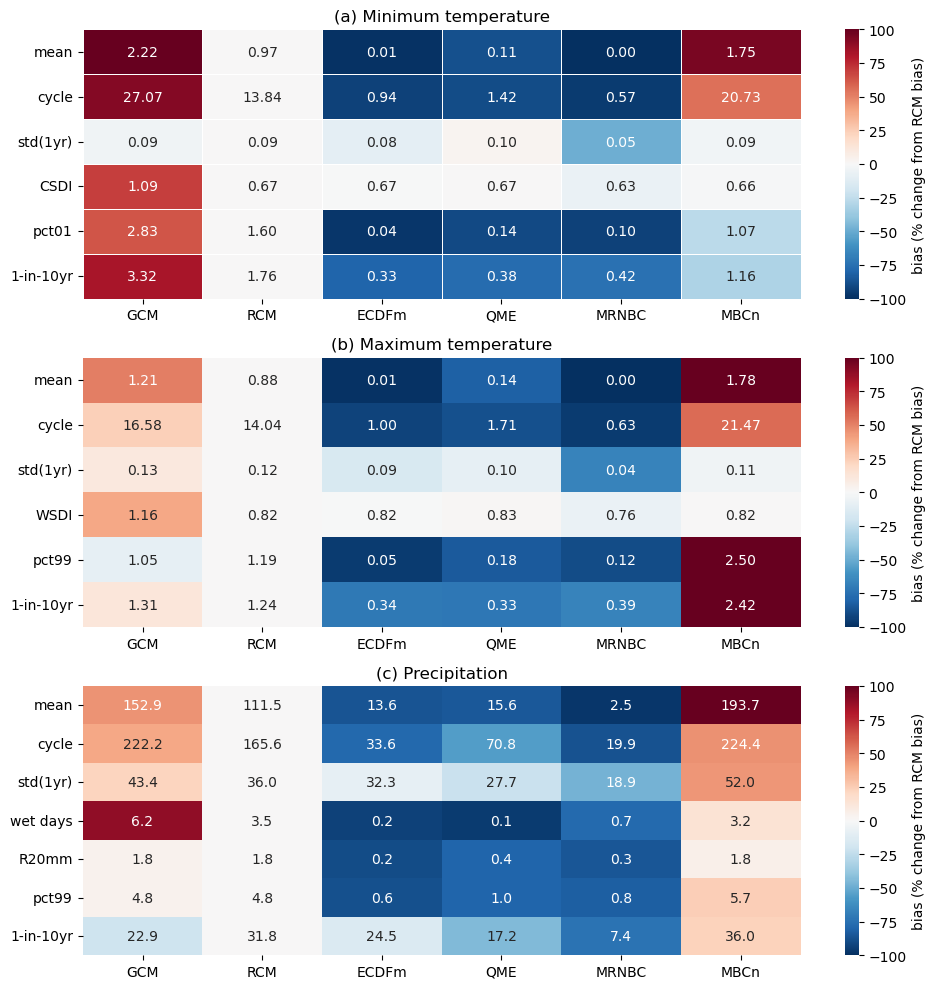

In [9]:
plot_task('hist')

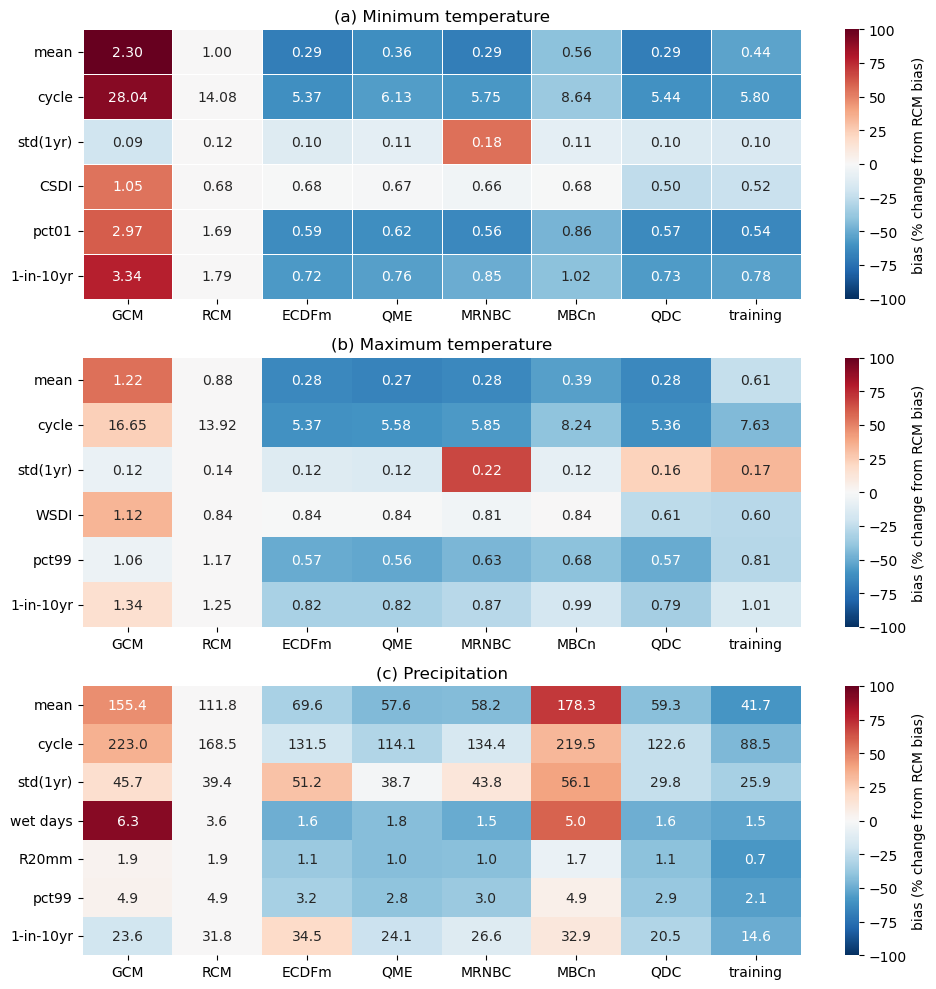

In [10]:
plot_task('xval')